<a href="https://colab.research.google.com/github/owepper/dataviz2025/blob/main/Final_Group2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2
นางสาวบุญญารัสมิ์ เสนจันทร์ 663020036-9

นางสาวจิตรลดา นิมินรัมย์ 663020278-5

นายภัทรพล วรรณยศ 663020287-4

นางสาวสิริกร บุตรวงษ์ 663020299-7

นางสาวพัชรี ดียา 663020583-0

นายวชิรวิทย์ มูลละออง  663020584-8


# looker Studio

[https://lookerstudio.google.com/reporting/d2a16f2c-15d0-443d-a556-d71561bdef00](https://lookerstudio.google.com/reporting/d2a16f2c-15d0-443d-a556-d71561bdef00)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path_netflix = '/content/drive/MyDrive/Final Group2/Netflix-movies.xlsx'
path_top = '/content/drive/MyDrive/Final Group2/imdb_top_1000.csv'

# read Netflix

In [ ]:
df_netflix_sheet1 = pd.read_excel(path_netflix, sheet_name=0)
df_netflix_sheet1.head()

,Movie Title,Director,Country,Release Year,Rating,Length,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91 min,Children & Family Movies
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"


In [ ]:
df_netflix_sheet2 = pd.read_excel(path_netflix, sheet_name=1)
df_netflix_sheet2.head()

,Movie Title,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Percy Jackson & the Olympians: The Lightning T...,49.0,149.0,53.0,254421.0
1,Please Give,87.0,142.0,64.0,11574.0
2,10,67.0,24.0,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),100.0,54.0,97.0,105386.0
4,"20,000 Leagues Under The Sea",89.0,27.0,74.0,68918.0


In [ ]:
df_netflix_sheet1.shape

(6131, 7)

In [ ]:
df_netflix_sheet2.shape

(17712, 5)

In [ ]:
df_netflix_merged = pd.merge(df_netflix_sheet1, df_netflix_sheet2, on='Movie Title', how='inner')
df_netflix_merged.head()

,Movie Title,Director,Country,Release Year,Rating,Length,Genre,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,Comedies,11.0,168.0,62.0,270906.0
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",41.0,93.0,49.0,29217.0
2,Paranoia,Robert Luketic,"United States, India, France",2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0
3,Birth of the Dragon,George Nolfi,"China, Canada, United States",2017,PG-13,96 min,"Action & Adventure, Dramas",23.0,53.0,68.0,6385.0
4,Jaws,Steven Spielberg,United States,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",98.0,88.0,90.0,944601.0


In [ ]:
df_netflix_merged.shape

(1906, 11)

In [ ]:
df_netflix_merged.isnull().sum()

,0
Movie Title,0
Director,14
Country,0
Release Year,0
Rating,0
Length,0
Genre,0
TOMATOMETER,3
# of Tomatometer Reviews,3
AUDIENCE SCORE,32


# Clean

In [ ]:
# Fill NaN in numerical columns with 0
numerical_cols = ['TOMATOMETER', '# of Tomatometer Reviews', 'AUDIENCE SCORE', '# of Audience Reviews']
df_netflix_merged[numerical_cols] = df_netflix_merged[numerical_cols].fillna(0)

# Fill NaN in 'Director' column with 'Unknown'
df_netflix_merged['Director'] = df_netflix_merged['Director'].fillna('Unknown')

# Verify that null values have been filled
display(df_netflix_merged.isnull().sum())

,0
Movie Title,0
Director,0
Country,0
Release Year,0
Rating,0
Length,0
Genre,0
TOMATOMETER,0
# of Tomatometer Reviews,0
AUDIENCE SCORE,0


#แยก Country

In [ ]:
df_netflix_split_country = df_netflix_merged.copy()

# Split the 'Country' column into a list
df_netflix_split_country['Country_list'] = df_netflix_split_country['Country'].astype(str).str.split(', ')

# Keep the first country in the 'Country' column
df_netflix_split_country['Country'] = df_netflix_split_country['Country_list'].str[0]

# Create a new DataFrame with the 'Other Countries' exploded
df_other_countries = df_netflix_split_country.assign(
    Other_Country_list=df_netflix_split_country['Country_list'].apply(lambda x: x[1:] if isinstance(x, list) and len(x) > 1 else [])
).explode('Other_Country_list')

# Drop rows where there are no other countries after explode
df_other_countries = df_other_countries[df_other_countries['Other_Country_list'] != '']


# Rename the exploded column to 'Other Country' and keep relevant columns
df_other_countries = df_other_countries.rename(columns={'Other_Country_list': 'Other Country'})
df_other_countries = df_other_countries[['Movie Title', 'Other Country']]

# Merge the original DataFrame (with first country) and the exploded other countries
df_result = pd.merge(df_netflix_split_country.drop(columns=['Country_list']), df_other_countries, on='Movie Title', how='left')

display(df_result.head())

,Movie Title,Director,Country,Release Year,Rating,Length,Genre,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,Other Country
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,Comedies,11.0,168.0,62.0,270906.0,NaN
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",41.0,93.0,49.0,29217.0,NaN
2,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India
3,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France
4,Birth of the Dragon,George Nolfi,China,2017,PG-13,96 min,"Action & Adventure, Dramas",23.0,53.0,68.0,6385.0,Canada


# แยก Genre

In [ ]:
df_split_genre = df_result.copy()

# Split the 'Genre' column into a list
df_split_genre['Genre_list'] = df_split_genre['Genre'].astype(str).str.split(', ')

# Keep the first genre in the 'Main Genre' column
df_split_genre['Main Genre'] = df_split_genre['Genre_list'].str[0]

# Create a new DataFrame with the 'Other Genres' exploded
df_other_genres = df_split_genre.assign(
    Other_Genre_list=df_split_genre['Genre_list'].apply(lambda x: x[1:] if isinstance(x, list) and len(x) > 1 else [])
).explode('Other_Genre_list')

# Drop rows where there are no other genres after explode
df_other_genres = df_other_genres[df_other_genres['Other_Genre_list'] != '']

# Rename the exploded column to 'Other Genre' and keep relevant columns
df_other_genres = df_other_genres.rename(columns={'Other_Genre_list': 'Other Genre'})
df_other_genres = df_other_genres[['Movie Title', 'Other Genre']]

# Merge the DataFrame with 'Main Genre' and the exploded other genres
df_result_genre = pd.merge(df_split_genre.drop(columns=['Genre_list', 'Genre']), df_other_genres, on='Movie Title', how='left')

display(df_result_genre.head())

,Movie Title,Director,Country,Release Year,Rating,Length,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,Other Country,Main Genre,Other Genre
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,11.0,168.0,62.0,270906.0,NaN,Comedies,NaN
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy
2,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,7.0,108.0,35.0,23401.0,India,Thrillers,NaN
3,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,7.0,108.0,35.0,23401.0,India,Thrillers,NaN
4,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,7.0,108.0,35.0,23401.0,France,Thrillers,NaN


In [ ]:
# Split the 'Genre' column into a list (if it's not already a list) and explode the DataFrame
df_exploded_genre = df_result.assign(
    Genre=df_result['Genre'].astype(str).str.split(', ')
).explode('Genre')

# Strip whitespace from the exploded genre names
df_exploded_genre['Genre'] = df_exploded_genre['Genre'].str.strip()

# Display the head of the new DataFrame
display(df_exploded_genre.head())

,Movie Title,Director,Country,Release Year,Rating,Length,Genre,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,Other Country
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,Comedies,11.0,168.0,62.0,270906.0,NaN
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Horror Movies,41.0,93.0,49.0,29217.0,NaN
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Sci-Fi & Fantasy,41.0,93.0,49.0,29217.0,NaN
2,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India
3,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France


In [ ]:
# Merge df_exploded_genre and df_result_genre to combine the genre-related columns
# We'll merge on 'Movie Title' and keep all rows from df_exploded_genre
df_combined_genres = pd.merge(
    df_exploded_genre,
    df_result_genre[['Movie Title', 'Main Genre', 'Other Genre']],
    on='Movie Title',
    how='left'
)

# Display the head of the new DataFrame with combined genre information
display(df_combined_genres.head(10))

,Movie Title,Director,Country,Release Year,Rating,Length,Genre,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,Other Country,Main Genre,Other Genre
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,Comedies,11.0,168.0,62.0,270906.0,NaN,Comedies,NaN
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Horror Movies,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy
2,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Sci-Fi & Fantasy,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy
3,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India,Thrillers,NaN
4,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India,Thrillers,NaN
5,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India,Thrillers,NaN
6,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India,Thrillers,NaN
7,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France,Thrillers,NaN
8,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France,Thrillers,NaN
9,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France,Thrillers,NaN


In [ ]:
df_combined_genres.shape

(227461, 14)

In [ ]:
data = df_combined_genres.drop_duplicates()

# data ที่ใช้

In [ ]:
data.shape

(6905, 14)

In [ ]:
netflix = data
netflix.head()

,Movie Title,Director,Country,Release Year,Rating,Length,Genre,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,Other Country,Main Genre,Other Genre
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,Comedies,11.0,168.0,62.0,270906.0,NaN,Comedies,NaN
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Horror Movies,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy
2,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Sci-Fi & Fantasy,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy
3,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India,Thrillers,NaN
7,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France,Thrillers,NaN


In [ ]:
netflix.shape

(6905, 14)

#Read Top1000

In [ ]:
df_top = pd.read_csv(path_top)
df_top.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df_top.shape

(1000, 16)

In [ ]:
df_top.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
df_top = df_top.drop(columns=['Certificate', 'Meta_score', 'No_of_Votes','Gross'])
df_top.head()

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [ ]:
df_top.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Director,0
Star1,0
Star2,0


#แยก Genre

In [ ]:
df_split_genre = df_top.copy()

# Split the 'Genre' column into a list
df_split_genre['Genre_list'] = df_split_genre['Genre'].astype(str).str.split(', ')

# Keep the first genre in the 'Main Genre' column
df_split_genre['Main Genre'] = df_split_genre['Genre_list'].str[0]

# Create a new DataFrame with the 'Other Genres' exploded
df_other_genres = df_split_genre.assign(
    Other_Genre_list=df_split_genre['Genre_list'].apply(lambda x: x[1:] if isinstance(x, list) and len(x) > 1 else [])
).explode('Other_Genre_list')

# Drop rows where there are no other genres after explode
df_other_genres = df_other_genres[df_other_genres['Other_Genre_list'] != '']

# Rename the exploded column to 'Other Genre' and keep relevant columns
df_other_genres = df_other_genres.rename(columns={'Other_Genre_list': 'Other Genre'})
df_other_genres = df_other_genres[['Series_Title', 'Other Genre']]

# Merge the DataFrame with 'Main Genre' and the exploded other genres
df_result_genre_top = pd.merge(df_split_genre.drop(columns=['Genre_list', 'Genre']), df_other_genres, on='Series_Title', how='left')

display(df_result_genre_top.head())

,Poster_Link,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Main Genre,Other Genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Drama,NaN
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,Crime,Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime
3,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Drama
4,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,Crime,Drama


In [ ]:
df_result_genre_top.shape

(1650, 13)

#รวม 2 ไฟล์

In [ ]:
# Select only the necessary columns from df_top for merging
df_top_for_merge = df_top[['Series_Title', 'IMDB_Rating']].rename(columns={'Series_Title': 'Movie Title'})

# Perform a left merge to add IMDB_Rating to df_netflix
# Keep all rows from df_netflix and add IMDB_Rating where Movie Titles match
df_netflix_with_imdb = pd.merge(netflix, df_top_for_merge, on='Movie Title', how='left')

# Fill the NaN values in the new 'IMDB_Rating' column with 0
df_netflix_with_imdb['IMDB_Rating'] = df_netflix_with_imdb['IMDB_Rating'].fillna(0)

# Display the head of the updated DataFrame
display(df_netflix_with_imdb.head())

,Movie Title,Director,Country,Release Year,Rating,Length,Genre,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,Other Country,Main Genre,Other Genre,IMDB_Rating
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,Comedies,11.0,168.0,62.0,270906.0,NaN,Comedies,NaN,0.0
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Horror Movies,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy,0.0
2,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Sci-Fi & Fantasy,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy,0.0
3,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India,Thrillers,NaN,0.0
4,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France,Thrillers,NaN,0.0


In [ ]:
import numpy as np

# Create the 'Type' column based on the IMDB_Rating
# If IMDB_Rating is greater than 0, it's 'Original Netflix Films', otherwise it's 'Movie'
df_netflix_with_imdb['Type'] = np.where(df_netflix_with_imdb['IMDB_Rating'] > 0, 'Original Netflix Films', 'Movie')

# Display the head of the DataFrame with the new 'Type' column
display(df_netflix_with_imdb.head(10))

,Movie Title,Director,Country,Release Year,Rating,Length,Genre,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,Other Country,Main Genre,Other Genre,IMDB_Rating,Type
0,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min,Comedies,11.0,168.0,62.0,270906.0,NaN,Comedies,NaN,0.0,Movie
1,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Horror Movies,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy,0.0,Movie
2,Dark Skies,Scott Stewart,United States,2013,PG-13,97 min,Sci-Fi & Fantasy,41.0,93.0,49.0,29217.0,NaN,Horror Movies,Sci-Fi & Fantasy,0.0,Movie
3,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,India,Thrillers,NaN,0.0,Movie
4,Paranoia,Robert Luketic,United States,2013,PG-13,106 min,Thrillers,7.0,108.0,35.0,23401.0,France,Thrillers,NaN,0.0,Movie
5,Birth of the Dragon,George Nolfi,China,2017,PG-13,96 min,Action & Adventure,23.0,53.0,68.0,6385.0,Canada,Action & Adventure,Dramas,0.0,Movie
6,Birth of the Dragon,George Nolfi,China,2017,PG-13,96 min,Dramas,23.0,53.0,68.0,6385.0,Canada,Action & Adventure,Dramas,0.0,Movie
7,Birth of the Dragon,George Nolfi,China,2017,PG-13,96 min,Action & Adventure,23.0,53.0,68.0,6385.0,United States,Action & Adventure,Dramas,0.0,Movie
8,Birth of the Dragon,George Nolfi,China,2017,PG-13,96 min,Dramas,23.0,53.0,68.0,6385.0,United States,Action & Adventure,Dramas,0.0,Movie
9,Jaws,Steven Spielberg,United States,1975,PG,124 min,Action & Adventure,98.0,88.0,90.0,944601.0,NaN,Action & Adventure,Classic Movies,8.0,Original Netflix Films


In [ ]:
# Define the path to save the file in Google Drive
save_path = '/content/drive/MyDrive/Final Group2/df_netflix_with_imdb.xlsx'

# Save the DataFrame to an Excel file
df_netflix_with_imdb.to_excel(save_path, index=False)

print(f"DataFrame saved successfully to {save_path}")

DataFrame saved successfully to /content/drive/MyDrive/Final Group2/df_netflix_with_imdb.xlsx


#Word Could

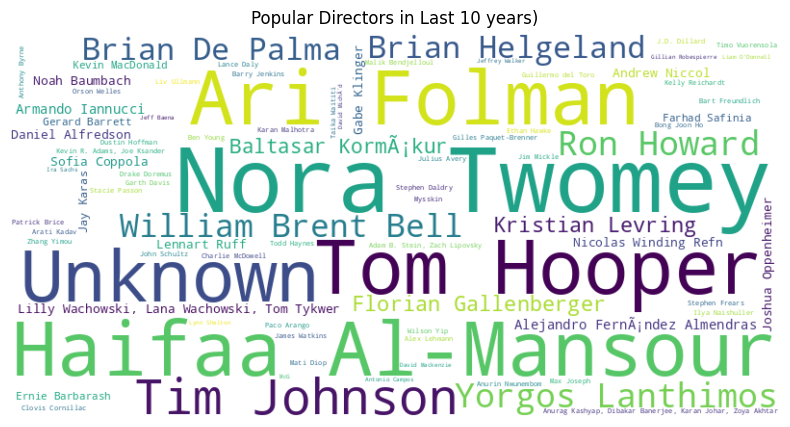

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame for movies released between 2012 and 2021
df_filtered_years_netflix = df_netflix_with_imdb[(df_netflix_with_imdb['Release Year'] >= 2012) & (df_netflix_with_imdb['Release Year'] <= 2021)]


# Get the value counts for 'Director' in the filtered DataFrame
director_counts_filtered_years_netflix = df_filtered_years_netflix['Director'].value_counts().dropna()

# Create a word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(director_counts_filtered_years_netflix)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Popular Directors in Last 10 years)')
plt.show()

# Bar Chart

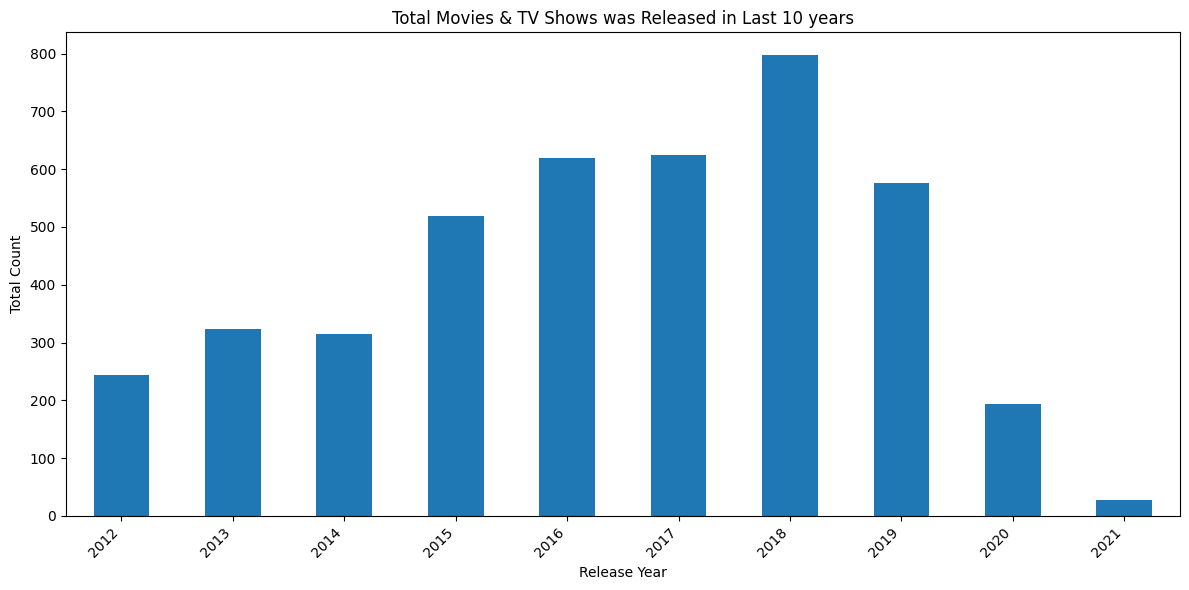

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the years 2012 to 2021
df_filtered_years_netflix = df_netflix_with_imdb[(df_netflix_with_imdb['Release Year'] >= 2012) & (df_netflix_with_imdb['Release Year'] <= 2021)]

# Get the value counts for 'Release Year' in the filtered DataFrame and sort by year
release_year_counts_filtered_netflix = df_filtered_years_netflix['Release Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
release_year_counts_filtered_netflix.plot(kind='bar')
plt.title('Total Movies & TV Shows was Released in Last 10 years')
plt.xlabel('Release Year')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()